# CDC WONDER API Example
[CDC WONDER](https://wonder.cdc.gov/) is a query tool from the Centers for Disease Control (CDC) that provides access to a collection of online databases for the analysis of public health data. 

The following are a sampling of databases available through WONDER that provide vital statistics data through CDC's National Center for Health Statistics

* [Births](https://wonder.cdc.gov/natality.html)
* [Detailed Mortality](https://wonder.cdc.gov/ucd-icd10.html)
* [Compressed Mortality](https://wonder.cdc.gov/mortSQL.html)
* [Multiple cause of death](https://wonder.cdc.gov/mcd.html)
* [Infant Deaths](https://wonder.cdc.gov/lbd.html)

For this example, we will focus on the [Detailed Mortality](https://wonder.cdc.gov/ucd-icd10.html) database, which provides counts or rates (crude or age-adjusted) for underlying cause of death at the national, state and county levels. Using the query tool, the user can select grouping and filtering variables that are use to generate a dataset. Results are provided as a data table which can then be exported to a tab delimited file or visualized.

WONDER provides an API that allows the same queries to be issued through a POST request to WONDER's web server. Requests and responses are issued in XML format and are detailed in the [API Documentation](https://wonder.cdc.gov/wonder/help/WONDER-API.html) page. 

Each XML request consists of a series of parameter tags with name and value children in the following format:

```
<request-parameters>
    <parameter>
        <name></name>
        <value></value>
    <parameter>
    ...
</request-parameters>
```

A reference of parameter names and values can be found on [CDC WONDER Wiki page](https://loyola.campuspack.net/Groups/17FA_CS-703-501/Pet_API#/page/364768481#referenceParameters)

In [315]:
# BeautifulSoup library facilitates parsing of HTML form
import bs4 as bs
import re

dom = {}
with open('./Natality, 2016-2021 expanded Request Form.html','rb') as html_file:
    html_content = html_file.read()
    dom = bs.BeautifulSoup(html_content,"lxml")
    

In [316]:
import unicodedata
def escape_ansi(line):
    # ansi_escape =re.compile(r'(\x9B|\x1B\[)[0-?]*[ -\/]*[@-~]')
    # return ansi_escape.sub('', line)
    return unicodedata.normalize("NFKD",line)


In [410]:
# by-variables" or those parameters selected in the "Group Results By" and the "And By" drop-down lists 
# in the "Request Form." These "by-variables" are the cross-tabulations, stratifications or indexes 
# to the query results. Expect the results data table to show a row for each category in the by-variables, 
# and a column for each measure. For example, if you wish to compare data by sex, then "group results by" gender, 
# to get a row for females and a row for males in the output.
# M_ are measures to return, the default measures plus any optional measures.

# For this example, will group by year and race
# Maternal Residence
# "D149.V22-level1" = Census Region of Residence
# "D149.V22-level2" = Census Division of Residence
# "D149.V37-level1" = HHS Region of Residence
# "D149.V21-level1" = State of Residence
# "D149.V21-level2" = County of Residence
# "D149.V154" = 2013 Metro/Nonmetro
# "D149.V155" = 2006 Metro/Nonmetro
# "D149.V156" = 2006 Urbanization

# Maternal characteristics
# "D149.V42" = Mother's Single Race 6
# "D149.V49" = Mother's Single Race 15
# "D149.V50" = Mother's Single/Multi Race 31
# "D149.V43" = Mother's Hispanic Origin
# "D149.V4" = Mother's Expanded Hispanic Origin
# "D149.V1" = Age of Mother 9
# "D149.V38" = Age of Mother 13
# "D149.V5" = Mother's Education
# "D149.V27" = Marital Status
# "D149.V51" = Paternity Acknowledgment (if mother unmarried)
# "D149.V48" = Mother's Nativity
# "D149.V147" = Mother's Birth Country
# "D149.V47" = Mother's Birth State

# Paternal characteristics
# "D149.V54" = Father's Single Race 6
# "D149.V55" = Father's Single Race 15
# "D149.V56" = Father's Single/Multi Race 31
# "D149.V53" = Father's Hispanic Origin
# "D149.V52" = Father's Expanded Hispanic Origin
# "D149.V57" = Age of Father
# "D149.V58" = Father's Education

# Pregnancy history and prenatal care characteristics
# "D149.V60" = Interval Since Last Live Birth
# "D149.V61" = Interval Since Last Other Pregnancy Outcome
# "D149.V62" = Interval of Last Pregnancy
# "D149.V151" = Prior Births Now Living
# "D149.V152" = Prior Births Now Dead
# "D149.V153" = Prior Other Pregnancy Outcomes
# "D149.V28" = Live Birth Order
# "D149.V59" = Total Birth Order
# "D149.V66" = WIC
# "D149.V89" = Successful External Cephalic Version
# "D149.V90" = Failed External Cephalic Version
# "D149.V65" = Number of Prenatal Visits Recode
# "D149.V64" = SNumber of Prenatal Visits
# "D149.V63" = Trimester Prenatal Care Began
# "D149.V8" = Month Prenatal Care Began

# Maternal risk factors
# "D149.V70" = Mother's Height in Inches
# "D149.V71" = Mother's Pre-pregnancy BMI
# "D149.V73" = Mother's Weight Gain Recode
# "D149.V149" = Mother's Pre-pregnancy Weight
# "D149.V150" = Mother's Delivery Weight
# "D149.V10" = Tobacco Use
# "D149.V143" = Number of Cigarettes Before Pregnancy Recode
# "D149.V144" = Number of Cigarettes 1st Trimester Recode
# "D149.V140" = Number of Cigarettes 1st Trimester
# "D149.V145" = Number of Cigarettes 2nd Trimester Recode
# "D149.V141" = Number of Cigarettes 2nd Trimester
# "D149.V146" = Number of Cigarettes 3rd Trimester Recode
# "D149.V142" = Number of Cigarettes 3rd Trimester

# Pregnancy risk factors
# "D149.V74" = Pre-pregnancy Diabetes
# "D149.V75" = Gestational Diabetes
# "D149.V16" = Pre-pregnancy Hypertension
# "D149.V17" = Gestational Hypertension
# "D149.V18" = Eclampsia
# "D149.V76" = Previous Preterm Birth
# "D149.V77" = Infertility Treatment Used
# "D149.V78" = Fertility Enhancing Drugs
# "D149.V79" = Assistive Reproductive Technology
# "D149.V80" = Previous Cesarean Delivery
# "D149.V81" = Number of Previous Cesareans
# "D149.V82" = Risk Factors Checked

# Maternal infections present and/or treated during pregnancy
# "D149.V83" = Gonorrhea
# "D149.V84" = Syphilis
# "D149.V85" = Chlamydia
# "D149.V86" = Hepatitis B
# "D149.V87" = Hepatitis C
# "D149.V88" = Infections Checked

# Labor characteristics
# "D149.V91" = Induction of Labor
# "D149.V92" = Augmentation of Labor
# "D149.V93" = Steroids
# "D149.V94" = Antibiotics for Mother
# "D149.V95" = Chorioamnionitis
# "D149.V96" = Anesthesia
# "D149.V97" = Characteristics of Labor Checked

# Delivery characteristics
# "D149.V20" = Year
# "D149.V25" = Month
# "D149.V26" = Weekday
# "D149.V44" = Time of Day
# "D149.V45" = Birthplace
# "D149.V30" = Birthplace Recode 6
# "D149.V46" = Birthplace Recode 3
# "D149.V29" = Medical Attendant
# "D149.V108" = Mother Transferred
# "D149.V98" = Fetal Presentation
# "D149.V99" = Final Route and Delivery Method
# "D149.V101" = Delivery Method Expanded
# "D149.V31" = Delivery Method
# "D149.V100" = Trial of Labor Attempted (if cesarean)
# "D149.V110" = Source of Payment for Delivery
# "D149.V109" = Source of Payment for Delivery Expanded

# Maternal morbidity
# "D149.V102" = Maternal Transfusion
# "D149.V103" = Perineal Laceration
# "D149.V104" = Ruptured Uterus
# "D149.V105" = Unplanned Hysterectomy
# "D149.V106" = Admission to Intensive Care Unit
# "D149.V107" = Maternal Morbidity Checked

# Infant characteristics
# "D149.V32" = OE Gestational Age Recode 10
# "D149.V33" = OE Gestational Age Recode 11
# "D149.V34" = OE Gestational Age Weekly
# "D149.V6" = LMP Gestational Recode 10
# "D149.V23" = LMP Gestational Recode 11
# "D149.V24" = LMP Gestational Age Weekly
# "D149.V3" = Sex of Infant
# "D149.V7" = Plurality
# "D149.V115" = Set Order
# "D149.V9" = Infant Birth Weight 12
# "D149.V35" = Infant Birth Weight 14
# "D149.V41" = Infant Birth Weight 100 gram increments
# "D149.V111" = Five Minute APGAR Score
# "D149.V112" = Five Minute APGAR Score Recode
# "D149.V113" = Ten Minute APGAR Score
# "D149.V114" = Ten Minute APGAR Score Recode
# "D149.V136" = Infant Transferred
# "D149.V137" = Infant Living at Time of Report
# "D149.V138" = Infant Breastfed at Discharge

# Abnormal conditions of newborn
# "D149.V116" = Assisted Ventilation
# "D149.V117" = Assisted Ventilation > 6 hrs
# "D149.V118" = NICU Admission
# "D149.V119" = Surfactant Replacement Therapy
# "D149.V120" = Antibiotics for Suspected Neonatal Sepsis
# "D149.V121" = Seizures
# "D149.V122" = Abnormal Conditions Checked

# Congenital anomalies of newborn
# "D149.V123" = Anencephaly
# "D149.V124" = Meningomyelocele / Spina Bifida
# "D149.V125" = Cyanotic Congenital Heart Disease
# "D149.V126" = Congenital Diaphragmatic Hernia
# "D149.V127" = Omphalocele
# "D149.V128" = Gastroschisis
# "D149.V129" = Limb Reduction Defect
# "D149.V130" = Cleft Lip with or without Cleft Palate
# "D149.V131" = Cleft Palate Alone
# "D149.V132" = Down Syndrome
# "D149.V133" = Suspected Chromosomal Disorder
# "D149.V134" = Hypospadias
# "D149.V135" = Congenital Anomalies Checked

# b_parameters = {
#     "B_1": "D76.V1-level1", 
#     "B_2": "D76.V8", 
#     "B_3": "*None*", 
#     "B_4": "*None*", 
#     "B_5": "*None*"
# }


b_parameters = {
    "B_1": "*None*", #D149.V144
    # "B_2": "D149.V22-level2", 
    # "B_3": "D149.V37-level1", 
    "B_2": "*None*", 
    "B_3": "*None*",
    "B_4": "*None*",
    "B_5": "*None*",
}
# b_parameters = {
#     "B_1": "D149.V22-level1", 
#     "B_2": "D149.V21-level1", 
#     # "B_3": "D149.V37-level1",
#     "B_3": "D149.V42",
#     "B_4": "D149.V43",
#     "B_5": "D149.V20"
# }

In [407]:
# measures to return, the default measures plus any optional measures

# For this example, include deaths, population, and crude rate

# M_002 : D149.M002 Births
# M_004 : D149.M004 Birth Rate 		Birth Rates are only allowed for the following selections in the Group Results By list: Census Region, Census Division, HHS Region, State, County, Year, Mother's Hispanic Origin, Mother's Single Race 6.
# M_006 : D149.M006 Fertility Rate  Fertility Rates are only allowed for the following selections in the Group Results By list: Census Region, Census Division, HHS Region, State, County, Year, Mother's Hispanic Origin, Mother's Single Race 6, Age of Mother 9.
# M_007 : D149.M007 Percent of Total Births
# M_070 : D149.M070 Average Age of Mother (years)
# M_071 : D149.M071 Average Age of Mother (years) Standard Deviation
# M_080 : D149.M080 Average OE Gestational Age (weeks)
# M_081 : D149.M081 Average OE Gestational Age (weeks) Standard Deviation
# M_090 : D149.M091 Average LMP Gestational Age (weeks)
# M_091 : D149.M091 Average LMP Gestational Age (weeks) Standard Deviation
# M_095 : D149.M095 Average Birth Weight (grams)
# M_096 : D149.M096 Average Birth Weight (grams) Standard Deviation
# M_100 : D149.M100 Average Pre-pregnancy BMI
# M_101 : D149.M101 Average Pre-pregnancy BMI Standard Deviation
# M_110 : D149.M110 Average Number of Prenatal Visits
# M_111 : D149.M111 Average Number of Prenatal Visits Standard Deviation
# M_120 : D149.M120 Average Interval Since Last Live Birth (months)
# M_121 : D149.M121 Average Interval Since Last Live Birth (months) Standard Deviation
# M_130 : D149.M130 Average Interval Since Last Other Pregnancy Outcome (months)
# M_131 : D149.M130 Average Interval Since Last Other Pregnancy Outcome (months) Standard Deviation

# m_parameters = {
#     "M_1": "D76.M1",   # Deaths, must be included
#     "M_2": "D76.M2",   # Population, must be included
#     "M_3": "D76.M3",   # Crude rate, must be included
#     #"M_31": "D76.M31",        # Standard error (crude rate)
#     #"M_32": "D76.M32"         # 95% confidence interval (crude rate)
#     "M_41": "D76.M41", # Standard error (age-adjusted rate)
#     "M_42": "D76.M42"  # 95% confidence interval (age-adjusted rate)
# }

m_parameters = {
    "M_002": "D149.M002",   # Births, must be included
    # "M_004": "D149.M004",   # Percent of Total Births
}

In [319]:
f_attr = {}
for fattr in dom.find_all('select',attrs={"name" : re.compile('^F_*')}):
    if fattr['name'] not in f_attr:
        f_attr[fattr['name']] = {}
    for option in fattr.children:
        if option.name and option.name == 'option':
            f_attr[fattr['name']][option['value']]=escape_ansi(option.text.strip())

In [344]:
# values highlighted in a "Finder" control for hierarchical lists, 
# such as the "Regions/Divisions/States/Counties hierarchical" list.

# For this example, include all years, months, census regions, hhs regions, states. Only include ICD-10 K00-K92
# for disease of the digestive system

# F_D149.V21 :    *All*  (The United States)
#                 01     (Alabama)
#                 02     (Alaska)
#                 04     (Arizona)
#                 05     (Arkansas)
#                 06     (California)
#                 08     (Colorado)
#                 09     (Connecticut)
#                 10     (Delaware)
#                 11     (District of Columbia)
#                 12     (Florida)
#                 13     (Georgia)
#                 15     (Hawaii)
#                 16     (Idaho)
#                 17     (Illinois)
#                 18     (Indiana)
#                 19     (Iowa)
#                 20     (Kansas)
#                 21     (Kentucky)
#                 22     (Louisiana)
#                 23     (Maine)
#                 24     (Maryland)
#                 25     (Massachusetts)
#                 26     (Michigan)
#                 27     (Minnesota)
#                 28     (Mississippi)
#                 29     (Missouri)
#                 30     (Montana)
#                 31     (Nebraska)
#                 32     (Nevada)
#                 33     (New Hampshire)
#                 34     (New Jersey)
#                 35     (New Mexico)
#                 36     (New York)
#                 37     (North Carolina)
#                 38     (North Dakota)
#                 39     (Ohio)
#                 40     (Oklahoma)
#                 41     (Oregon)
#                 42     (Pennsylvania)
#                 44     (Rhode Island)
#                 45     (South Carolina)
#                 46     (South Dakota)
#                 47     (Tennessee)
#                 48     (Texas)
#                 49     (Utah)
#                 50     (Vermont)
#                 51     (Virginia)
#                 53     (Washington)
#                 54     (West Virginia)
#                 55     (Wisconsin)
#                 56     (Wyoming)

# F_D149.V22      *All*  (The United States)
#                 CENS-R1 (Census Region 1: Northeast)
#                 CENS-R2 (Census Region 2: Midwest)
#                 CENS-R3 (Census Region 3: South)
#                 CENS-R4 (Census Region 4: West)

# F_D149.V37      *All* (The United States)
#                 HHS1 (HHS Region #1 CT, ME, MA, NH, RI, VT)
#                 HHS2 (HHS Region #2 NJ, NY)
#                 HHS3 (HHS Region #3 DE, DC, MD, PA, VA, WV)
#                 HHS4 (HHS Region #4 AL, FL, GA, KY, MS, NC, SC, TN)
#                 HHS5 (HHS Region #5 IL, IN, MI, MN, OH, WI)
#                 HHS6 (HHS Region #6 AR, LA, NM, OK, TX)
#                 HHS7 (HHS Region #7 IA, KS, MO, NE)
#                 HHS8 (HHS Region #8 CO, MT, ND, SD, UT, WY)
#                 HHS9 (HHS Region #9 AZ, CA, HI, NV)
#                 HHS10 (HHS Region #10 AK, ID, OR, WA)



# f_parameters = {
#     "F_D76.V1": ["*All*"], # year/month
#     "F_D76.V10": ["*All*"], # Census Regions - dont change
#     "F_D76.V2": ["K00-K92"], # ICD-10 Codes
#     "F_D76.V27": ["*All*"], # HHS Regions - dont change
#     "F_D76.V9": ["*All*"] # State County - dont change
# }

f_parameters = {k:[list(v.keys())[0]] for (k,v) in f_attr.items()}

In [350]:
# f_attr['F_D149.V22']
# print(f_attr['F_D149.V37'])


f_parameters['F_D149.V21']='06'
f_parameters['F_D149.V22']='CENS-R4'
f_parameters['F_D149.V37']='HHS9'

In [351]:
i_attr = {}
for iattr in dom.find_all('select',attrs={"name" : re.compile('^I_*')}):
    if iattr['name'] not in i_attr:
        i_attr[iattr['name']] = {}
    for option in iattr.children:
        if option.name and option.name == 'option':
            i_attr[iattr['name']][option['value']]=escape_ansi(option.text.strip())

In [352]:
# i_attr = {'I_D149.V21': '*All*', 'I_D149.V22': '*All*', 'I_D149.V37': '*All*'}
i_parameters = {k:list(v.keys())[0] for (k,v) in i_attr.items()}
for key in f_attr:
    i_parameters[f'I{key[1:]}'] = f_attr[key][f_parameters[key]]

i_parameters

{'I_D149.V21': '+ 06  (California)',
 'I_D149.V22': '+ CENS-R4  (Census Region 4: West)',
 'I_D149.V37': '+ HHS9  (HHS Region #9  AZ, CA, HI, NV)'}

In [324]:
# contents of the "Currently selected" information areas next to "Finder" controls in the "Request Form."

# For this example, include all dates, census regions, hhs regions, and states.
# Only include ICD-10 code K00-K92 for disease of the digestive system

# i_parameters = {
#     "I_D76.V1": "*All* (All Dates)",  # year/month
#     "I_D76.V10": "*All* (The United States)", # Census Regions - dont change
#     "I_D76.V2": "K00-K92 (Diseases of the digestive system)", # ICD-10 Codes
#     "I_D76.V27": "*All* (The United States)", # HHS Regions - dont change
#     "I_D76.V9": "*All* (The United States)" # State County - dont change
# }

In [353]:
v_attr = {}
for vattr in dom.find_all('select',attrs={"name" : re.compile('^V_*')}):
    if vattr['name'] not in v_attr:
        v_attr[vattr['name']] = {}
    for option in vattr.children:
        if option.name and option.name == 'option':
            v_attr[vattr['name']][option['value']]=escape_ansi(option.text.strip())

In [359]:
print(sorted(v_attr.keys()))
v_parameters = {k:[list(v.keys())[0]] for (k,v) in v_attr.items()}

['V_D149.V1', 'V_D149.V10', 'V_D149.V100', 'V_D149.V101', 'V_D149.V102', 'V_D149.V103', 'V_D149.V104', 'V_D149.V105', 'V_D149.V106', 'V_D149.V107', 'V_D149.V108', 'V_D149.V109', 'V_D149.V110', 'V_D149.V111', 'V_D149.V112', 'V_D149.V113', 'V_D149.V114', 'V_D149.V115', 'V_D149.V116', 'V_D149.V117', 'V_D149.V118', 'V_D149.V119', 'V_D149.V120', 'V_D149.V121', 'V_D149.V122', 'V_D149.V123', 'V_D149.V124', 'V_D149.V125', 'V_D149.V126', 'V_D149.V127', 'V_D149.V128', 'V_D149.V129', 'V_D149.V130', 'V_D149.V131', 'V_D149.V132', 'V_D149.V133', 'V_D149.V134', 'V_D149.V135', 'V_D149.V136', 'V_D149.V137', 'V_D149.V138', 'V_D149.V139', 'V_D149.V140', 'V_D149.V141', 'V_D149.V142', 'V_D149.V143', 'V_D149.V144', 'V_D149.V145', 'V_D149.V146', 'V_D149.V147', 'V_D149.V149', 'V_D149.V150', 'V_D149.V151', 'V_D149.V152', 'V_D149.V153', 'V_D149.V154', 'V_D149.V155', 'V_D149.V156', 'V_D149.V157', 'V_D149.V16', 'V_D149.V17', 'V_D149.V18', 'V_D149.V20', 'V_D149.V23', 'V_D149.V24', 'V_D149.V25', 'V_D149.V26', 'V_D1

In [360]:
# variable values to limit in the "where" clause of the query, found in multiple select 
# list boxes and advanced finder text entry boxes in the "Request Form."

# For this example, we want to include ten-year age groups for ages 15-44.
# For all other categories, include all values

# V_D149.V154 *All*
#             Metro    Metro
#             Nonmetro Nonmetro
# V_D149.V42  *All*       All Races 
#             1002-5      American Indian or Alaska Native  
#             A           Asian
#             2054-5      Black or African American  
#             NHOPI       Native Hawaiian or Other Pacific Islander  
#             2106-3      White  
#             M           More than one race 
#             UNK         Unknown or Not Stated 
# V_D149.V43  *All*       All Origins
#             2135-2      Hispanic or Latino        
#             2186-5      Not Hispanic or Latino         
#             9           Unknown or Not Stated     
# V_D149.V1  *All*       All Ages
#             15         Under 15 years      
#             15-19      15-19 years      
#             20-24      20-24 years      
#             25-29      25-29 years      
#             30-34      30-34 years      
#             35-39      35-39 years      
#             40-44      40-44 years 
#             45-49      45-49 years  
#             50+        50 years and over  
# V_D149.V5  *All*       All Levels 
#             1          8th grade or less  
#             2          9th through 12th grade with no diploma   
#             3          High school graduate or GED completed   
#             4          Some college credit, but not a degree   
#             5          Associate degree (AA, AS)   
#             6          Bachelor's degree (BA, AB, BS)   
#             7          Master's degree (MA, MS, MEng, MEd, MSW, MBA)   
#             8          Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)   
#             Unk        Unknown or Not Stated    
#             Exc        Excluded    
#             NR         Not Reported 
# V_D149.V27 *All*       All Values     
#             1         Not Reported 
#             2          Unmarried  
#             9          Unknown or Not Stated  
#             NR         Not Reported
# V_D149.V51 *All*       All Values
#             1          Yes 
#             2          No 
#             9          Unknown or Not Stated 
#             3          Not Applicable 
#             10         Not Reported
# V_D149.V48 *All*       All Values
#             1          Born in the U.S. (50 US States) 
#             2          Born outside the U.S. (includes possessions) 
#             3          Unknown or Not Stated  
#             10         Not Reported 
# V_D149.V48 *All*       All Values

# v_parameters = {
#     "V_D76.V1": "",         # Year/Month
#     "V_D76.V10": "",        # Census Regions
#     "V_D76.V11": "*All*",   # 2006 Urbanization
#     "V_D76.V12": "*All*",   # ICD-10 130 Cause List (Infants)
#     "V_D76.V17": "*All*",   # Hispanic Origin
#     "V_D76.V19": "*All*",   # 2013 Urbanization
#     "V_D76.V2": "",         # ICD-10 Codes
#     "V_D76.V20": "*All*",   # Autopsy
#     "V_D76.V21": "*All*",   # Place of Death
#     "V_D76.V22": "*All*",   # Injury Intent
#     "V_D76.V23": "*All*",   # Injury Mechanism and All Other Leading Causes
#     "V_D76.V24": "*All*",   # Weekday
#     "V_D76.V25": "*All*",   # Drug/Alcohol Induced Causes
#     "V_D76.V27": "",        # HHS Regions
#     "V_D76.V4": "*All*",    # ICD-10 113 Cause List
#     "V_D76.V5": ["15-24", "25-34", "35-44"], # Ten-Year Age Groups
#     "V_D76.V51": "*All*",   # Five-Year Age Groups
#     "V_D76.V52": "*All*",   # Single-Year Ages
#     "V_D76.V6": "00",       # Infant Age Groups
#     "V_D76.V7": "*All*",    # Gender
#     "V_D76.V8": "*All*",    # Race
#     "V_D76.V9": ""          # State/County
# }
v_parameters

{'V_D149.V154': ['*All*'],
 'V_D149.V155': ['*All*'],
 'V_D149.V156': ['*All*'],
 'V_D149.V157': ['*All*'],
 'V_D149.V42': ['*All*'],
 'V_D149.V49': ['*All*'],
 'V_D149.V50': ['*All*'],
 'V_D149.V43': ['*All*'],
 'V_D149.V4': ['*All*'],
 'V_D149.V1': ['*All*'],
 'V_D149.V38': ['*All*'],
 'V_D149.V39': ['*All*'],
 'V_D149.V5': ['*All*'],
 'V_D149.V27': ['*All*'],
 'V_D149.V51': ['*All*'],
 'V_D149.V48': ['*All*'],
 'V_D149.V147': ['*All*'],
 'V_D149.V47': ['*All*'],
 'V_D149.V54': ['*All*'],
 'V_D149.V55': ['*All*'],
 'V_D149.V56': ['*All*'],
 'V_D149.V53': ['*All*'],
 'V_D149.V52': ['*All*'],
 'V_D149.V57': ['*All*'],
 'V_D149.V58': ['*All*'],
 'V_D149.V60': ['*All*'],
 'V_D149.V61': ['*All*'],
 'V_D149.V62': ['*All*'],
 'V_D149.V151': ['*All*'],
 'V_D149.V152': ['*All*'],
 'V_D149.V153': ['*All*'],
 'V_D149.V28': ['*All*'],
 'V_D149.V59': ['*All*'],
 'V_D149.V66': ['*All*'],
 'V_D149.V89': ['*All*'],
 'V_D149.V90': ['*All*'],
 'V_D149.V65': ['*All*'],
 'V_D149.V64': ['*All*'],
 'V_D14

In [361]:
v_parameters['V_D149.V42']=['1002-5']
v_parameters['V_D149.V43']=['2135-2']


In [362]:
o_attr = {}
for oattr in dom.find_all('select',attrs={"name" : re.compile('^O_*')}):
    if oattr['name'] not in o_attr:
        o_attr[oattr['name']] = {}
    for option in oattr.children:
        if option.name and option.name == 'option':
            o_attr[oattr['name']][option['value']]=escape_ansi(option.text.strip())

for oattr in dom.find_all('td',attrs={"class" : 'radio-cell'}):
    oAttr_name = oattr.findChild('input',attrs={"type":"radio","name" : re.compile('^O_*')})["name"]
    if oAttr_name not in o_attr:
        o_attr[oAttr_name] = {}
    for label in oattr.findChildren('label'):
        next_input = label.findNextSibling('input',attrs={"type":"radio","name" : re.compile('^O_*')})
        o_attr[oAttr_name][next_input['value']] = escape_ansi(label.text.strip())

o_attr['O_show_totals']={'true':'Show Totals','false':'Show Totals'}
o_attr['O_show_zeros']={'true':'Show Zeros','false':'Show Zeros'}
o_attr['O_show_suppressed']={'true':'Show suppressed values','false':'Show suppressed values'}
o_attr['O_V21_fmode']={'freg':''}
o_attr['O_V22_fmode']={'freg':''}
o_attr['O_V37_fmode']={'freg':''}
o_attr['O_javascript']={'on':''}
o_attr['O_oc-sect1-request']={'close':''}
o_attr

{'O_rate_per': {'1000': '1,000',
  '10000': '10,000',
  '100000': '100,000',
  '1000000': '1,000,000'},
 'O_precision': {'0': '0',
  '1': '1',
  '2': '2',
  '3': '3',
  '4': '4',
  '5': '5',
  '6': '6',
  '7': '7',
  '8': '8',
  '9': '9'},
 'O_timeout': {'60': '1',
  '120': '2',
  '180': '3',
  '240': '4',
  '300': '5',
  '360': '6',
  '420': '7',
  '480': '8',
  '540': '9',
  '600': '10',
  '660': '11',
  '720': '12',
  '780': '13',
  '840': '14',
  '900': '15'},
 'O_urban': {'D149.V154': '2013 Metro/Nonmetro',
  'D149.V155': '2006 Metro/Nonmetro',
  'D149.V156': '2013 Urbanization',
  'D149.V157': '2006 Urbanization'},
 'O_race': {'D149.V42': "Mother's Single Race 6",
  'D149.V49': "Mother's Single Race 15",
  'D149.V50': "Mother's Single/Multi Race 31"},
 'O_m_ethnicity': {'D149.V43': "Mother's Hispanic Origin",
  'D149.V4': "Mother's Expanded Hispanic Origin"},
 'O_age': {'D149.V1': 'Age of Mother 9',
  'D149.V38': 'Age of Mother 10',
  'D149.V39': 'Age of Mother 13'},
 'O_frace': 

In [386]:
o_parameters = {k:list(v.keys())[0] for (k,v) in o_attr.items()}
o_parameters['O_precision'] = '2'
o_parameters['O_timeout'] = '600'
o_parameters.keys()

dict_keys(['O_rate_per', 'O_precision', 'O_timeout', 'O_urban', 'O_race', 'O_m_ethnicity', 'O_age', 'O_frace', 'O_f_ethnicity', 'O_prenatal2', 'O_prenatal', 'O_cig_before', 'O_cig_trim1', 'O_cig_trim2', 'O_cig_trim3', 'O_place', 'O_delivery', 'O_pay', 'O_oe_gestation', 'O_gestation', 'O_weight', 'O_apgar5', 'O_apgar10', 'O_show_totals', 'O_show_zeros', 'O_show_suppressed', 'O_V21_fmode', 'O_V22_fmode', 'O_V37_fmode', 'O_javascript', 'O_oc-sect1-request'])

In [330]:
# other parameters, such as radio buttons, checkboxes, and lists that are not data categories

# For this example, include age-adjusted rates, use ten-year age groups (D76.V5), use state location by default, 
# show rates per 100,000, use 2013 urbanization and use ICD-10 Codes (D76.V2) for cause of death category

# O_title : "" Title of table
# O_rate_per : "1000,10000,100000,1000000" Calculate rates per
# O_location : "D149.V21,D149.V22,D149.V37" Select maternal residence
# O_V21_fmode: freg
# O_urban    : "D149.V154,D149.V155,D149.V156,D149.V157"
# O_race     : "D149.V42,D149.V49,D149.V50"
# O_m_ethnicity: "D149.V43,D149.V4"
# O_age      : "D149.V1,D149.V38,D149.V39"
# O_frace    : "D149.V54,D149.V55,D149.V56"

# o_parameters = {
#     "O_V10_fmode": "freg",    # Use regular finder and ignore v parameter value
#     "O_V1_fmode": "freg",     # Use regular finder and ignore v parameter value
#     "O_V27_fmode": "freg",    # Use regular finder and ignore v parameter value
#     "O_V2_fmode": "freg",     # Use regular finder and ignore v parameter value
#     "O_V9_fmode": "freg",     # Use regular finder and ignore v parameter value
#     "O_aar": "aar_std",       # age-adjusted rates
#     "O_aar_pop": "0000",      # population selection for age-adjusted rates
#     "O_age": "D76.V5",        # select age-group (e.g. ten-year, five-year, single-year, infant groups)
#     "O_javascript": "on",     # Set to on by default
#     "O_location": "D76.V9",   # select location variable to use (e.g. state/county, census, hhs regions)
#     "O_precision": "1",       # decimal places
#     "O_rate_per": "100000",   # rates calculated per X persons
#     "O_show_totals": "false",  # Show totals for 
#     "O_timeout": "300",
#     "O_title": "Digestive Disease Deaths, by Age Group",    # title for data run
#     "O_ucd": "D76.V2",        # select underlying cause of death category
#     "O_urban": "D76.V19"      # select urbanization category
# }

In [331]:
# values for non-standard age adjusted rates (see mortality online databases).

# For this example, these parameters are ignored as standard age adjusted rates are used

# vm_parameters = {
#     "VM_D76.M6_D76.V10": "",        # Location
#     "VM_D76.M6_D76.V17": "*All*",   # Hispanic-Origin
#     "VM_D76.M6_D76.V1_S": "*All*",  # Year
#     "VM_D76.M6_D76.V7": "*All*",    # Gender
#     "VM_D76.M6_D76.V8": "*All*"     # Race
# }

In [397]:
# Miscellaneous hidden inputs/parameters usually passed by web form. These do not change.

# finder-stage-D149.V21 : codeset
misc_parameters = {
    "action-Send": "Send",
    "finder-stage-D149.V21": "codeset",
    "finder-stage-D149.V22": "codeset",
    "finder-stage-D149.V37": "codeset",
    "dataset_code": "D149",
    "dataset_label": "Natality, 2016-2021 expanded",
    "saved_id": "",
    "stage": "request"
}

In [365]:
def createParameterList(parameterList):
    """Helper function to create a parameter list from a dictionary object"""
    
    parameterString = ""
    
    for key in parameterList:
        parameterString += "<parameter>\n"
        parameterString += "<name>" + key + "</name>\n"
        
        if isinstance(parameterList[key], list):
            for value in parameterList[key]:
                parameterString += "<value>" + value + "</value>\n"
        else:
            parameterString += "<value>" + parameterList[key] + "</value>\n"
        
        parameterString += "</parameter>\n"
        
    return parameterString

In [411]:
xml_request = "<request-parameters>\n"
xml_request += createParameterList(b_parameters)
xml_request += createParameterList(m_parameters)
xml_request += createParameterList(f_parameters)
xml_request += createParameterList(i_parameters)
xml_request += createParameterList(o_parameters)
# xml_request += createParameterList(vm_parameters)
xml_request += createParameterList(v_parameters)
xml_request += createParameterList(misc_parameters)
xml_request += "</request-parameters>"

In [412]:
import requests

url = "https://wonder.cdc.gov/controller/datarequest/D149"
response = requests.post(url, data={"request_xml": xml_request, "accept_datause_restrictions": "true"})

if response.status_code == 200:
    data = response.text
else:
    print("something went wrong")
    print(f'Error code: {response.status_code}')
    print(f'Reason: {response.reason}')
    print(response.content)

something went wrong
Error code: 500
Reason: 500
b'<?xml version="1.0"?>\r\n<page>\r\n<platform>prod</platform>\r\n<title>Processing Error</title>\r\n<message>To Group Results By {0} you must also select the {1} button where found below section #1.</message>\r\n<message>When requesting Birth Rates you are only allowed to select the value "ALL" for any variable other than Region, Division, HHS Region, State, County, Year, Single Race 6, and Hispanic Origin.</message>\r\n</page>'


In [336]:
# BeautifulSoup library facilitates parsing of XML response
import bs4 as bs

# This library faciliates 2-dimensional array operations and visualization
import pandas as pd

In [337]:
def xml2df(xml_data):
    """ This function grabs the root of the XML document and iterates over
        the 'r' (row) and 'c' (column) tags of the data-table
        Rows with a 'v' attribute contain a numerical value
        Rows with a 'l attribute contain a text label and may contain an
        additional 'r' (rowspan) tag which identifies how many rows the value
        should be added. If present, that label will be added to the following
        rows of the data table.
    
        Function returns a two-dimensional array or data frame that may be 
        used by the pandas library."""
    
    root = bs.BeautifulSoup(xml_data,"xml")
    all_records = []
    row_number = 0
    rows = root.find_all("r")
    
    for row in rows:
        if row_number >= len(all_records):
            all_records.append([])
              
        for cell in row.find_all("c"):
            if 'v' in cell.attrs:
                try:
                    all_records[row_number].append(float(cell.attrs["v"].replace(',','')))
                except ValueError:
                    all_records[row_number].append(cell.attrs["v"])
            else:
                if 'r' not in cell.attrs:
                    all_records[row_number].append(cell.attrs["l"])
                else:
                
                    for row_index in range(int(cell.attrs["r"])):
                        if (row_number + row_index) >= len(all_records):
                            all_records.append([])
                            all_records[row_number + row_index].append(cell.attrs["l"])
                        else:
                            all_records[row_number + row_index].append(cell.attrs["l"])
                                           
        row_number += 1
    return all_records

In [338]:
data_frame = xml2df(data)

df = pd.DataFrame(data=data_frame, columns=["Year", "Race", "Deaths", "Population", "Crude Rate", "Age-adjusted Rate", "Age-adjusted Rate Standard Error"])

df.head()

NameError: name 'data' is not defined

/var/folders/1g/r76h73zs77j7mtdjg0l92fpw0000gn/T/ipykernel_59411/1221141751.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['Year']).sum()['Deaths'].plot(title='Deaths from Digestive Disease: United States');


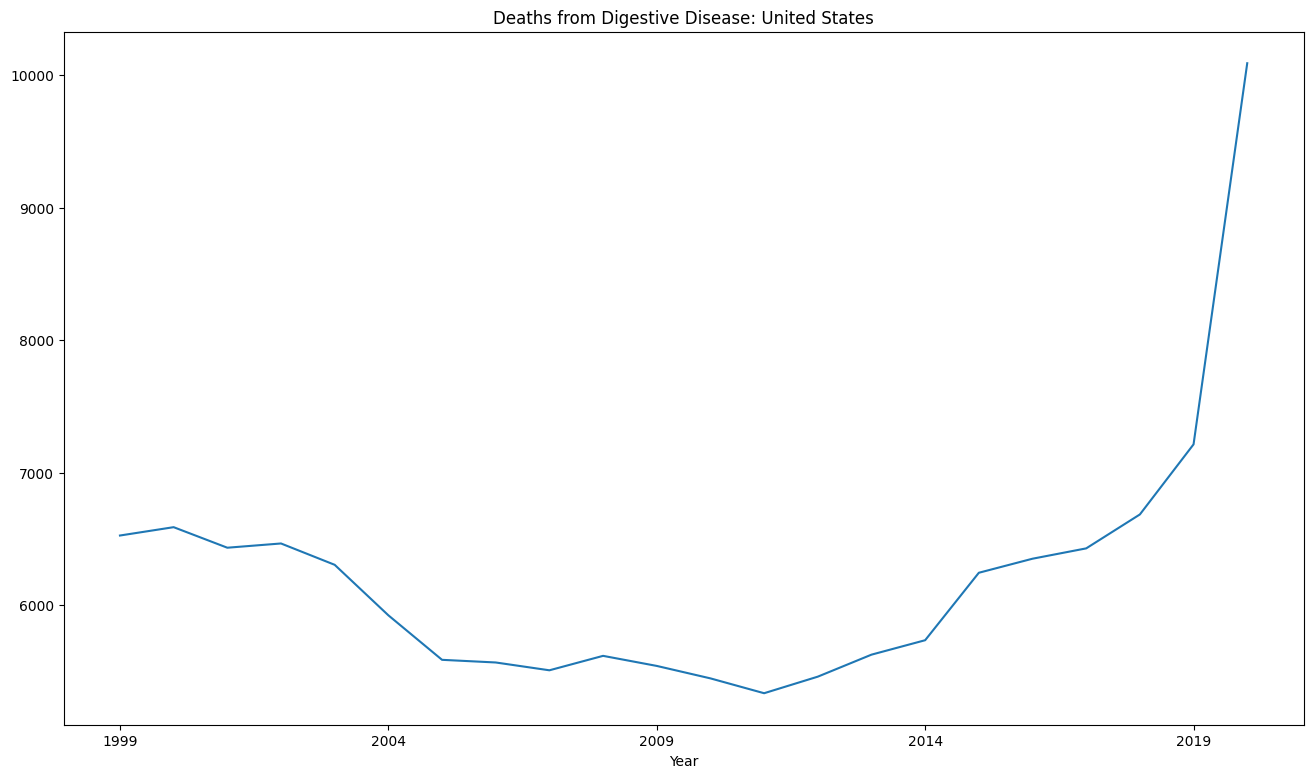

In [ ]:
# Load matplotlib for plotting and instruct jupyter to display figures inline
from matplotlib import pyplot as plt
%matplotlib inline

# Group total number of deaths by year
df.groupby(by=['Year']).sum()['Deaths'].plot(title='Deaths from Digestive Disease: United States');
fig = plt.gcf()
fig.set_size_inches(16, 9)

/var/folders/1g/r76h73zs77j7mtdjg0l92fpw0000gn/T/ipykernel_59411/2607476739.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df.groupby(['Race']):


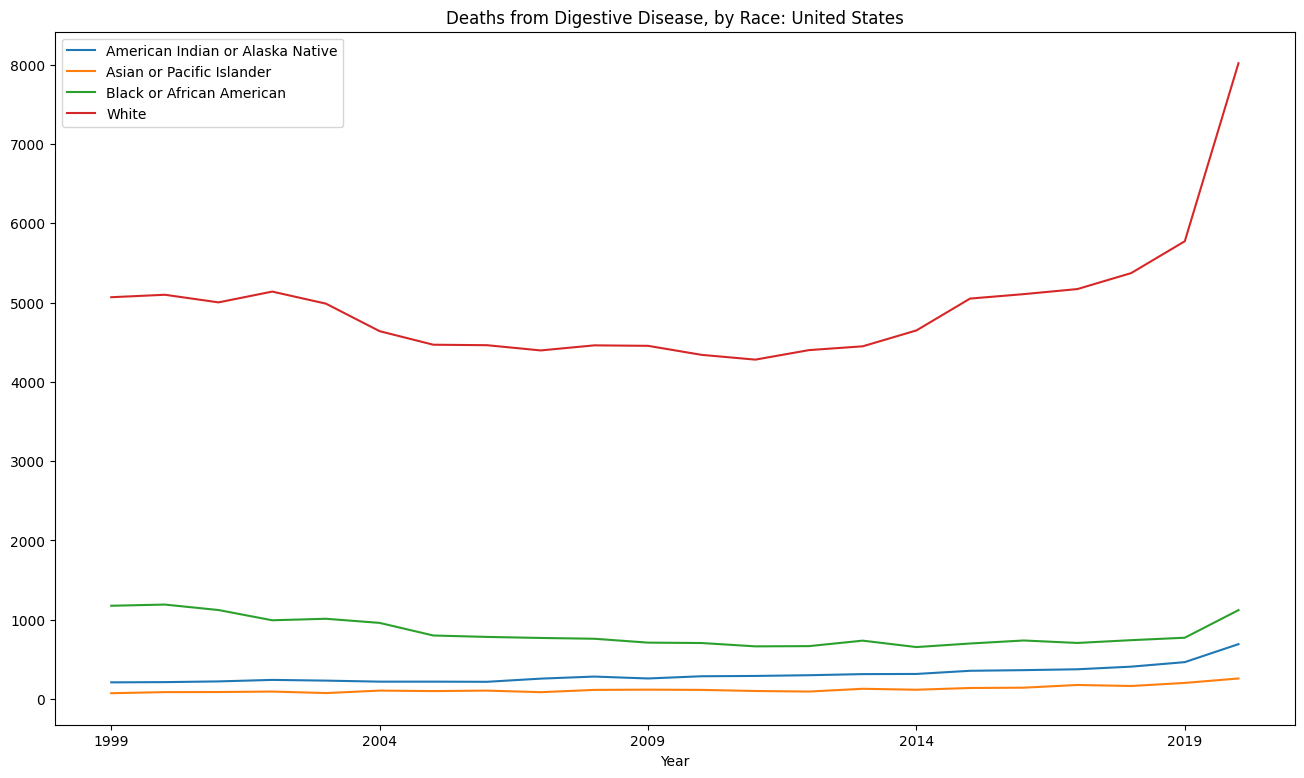

In [ ]:
# Create mult-line chart for deaths by race 

# Store figure and axis for shared plot
fig, ax = plt.subplots()

# Store labels for all race groups
labels = []

# For each group in the groupby object, grab the 'Race' label and create a line plot for it
for key, grp in df.groupby(['Race']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Deaths')
    labels.append(key)

# Set the labels for each line using the group labels
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Configure chart size and title
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Deaths from Digestive Disease, by Race: United States");

In [ ]:
# New query, this time we wish to group by year, month, and cause of death

b_parameters = {
    "B_1": "D76.V1-level1", # Year
    "B_2": "D76.V1-level2", # Month 
    "B_3": "D76.V2-level3 ",# Cause of death 
    "B_4": "*None*", 
    "B_5": "*None*"
}

f_parameters = {
    "F_D76.V1": ["*All*"], # year/month
    "F_D76.V10": ["*All*"], # Census Regions - dont change
    "F_D76.V2": ["X40","X41","X42","X43","X44","X60","X61","X62","X63","X64","X85","Y10","Y11","Y12","Y13","Y14"], 
        # ICD-10 Codes - Drug overdose deaths are identified using ICD–10 underlying cause-of-death codes: 
        # X40–X44, X60–X64, X85, and Y10–Y14.
    "F_D76.V27": ["*All*"], # HHS Regions - dont change
    "F_D76.V9": ["*All*"] # State County - dont change
}

v_parameters["V_D76.V5"] = "*All*"

In [ ]:
xml_request = "<request-parameters>\n"
xml_request += createParameterList(b_parameters)
xml_request += createParameterList(m_parameters)
xml_request += createParameterList(f_parameters)
xml_request += createParameterList(i_parameters)
xml_request += createParameterList(o_parameters)
xml_request += createParameterList(vm_parameters)
xml_request += createParameterList(v_parameters)
xml_request += createParameterList(misc_parameters)
xml_request += "</request-parameters>"

In [ ]:
url = "https://wonder.cdc.gov/controller/datarequest/D76"
response = requests.post(url, data={"request_xml": xml_request, "accept_datause_restrictions": "true"})

if response.status_code == 200:
    data = response.text
else:
    print("something went wrong")

In [ ]:
data_frame = xml2df(data)

df = pd.DataFrame(data=data_frame, columns=["Year", "Month", "Cause of Death", "Deaths", "Population", "Crude Rate", "Age-adjusted Rate", "Age-adjusted Rate Standard Error"])

df.head()

,Year,Month,Cause of Death,Deaths,Population,Crude Rate,Age-adjusted Rate,Age-adjusted Rate Standard Error
0,1999,"Jan., 1999",Accidental poisoning by and exposure to nonopi...,19.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,1999,"Jan., 1999",Accidental poisoning by and exposure to antiep...,47.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,1999,"Jan., 1999",Accidental poisoning by and exposure to narcot...,460.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,1999,"Jan., 1999",Accidental poisoning by and exposure to other ...,370.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,1999,"Jan., 1999",Intentional self-poisoning by and exposure to ...,68.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [ ]:
df.groupby(by='Year').sum().head()

/var/folders/1g/r76h73zs77j7mtdjg0l92fpw0000gn/T/ipykernel_59411/413049053.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Year').sum().head()


,Deaths
Year,
1999,16707.0
2000,17271.0
2001,19262.0
2002,23390.0
2003,25626.0


/var/folders/1g/r76h73zs77j7mtdjg0l92fpw0000gn/T/ipykernel_59411/1119229663.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groups = df.groupby(by=['Year','Cause of Death'],as_index=False).sum()


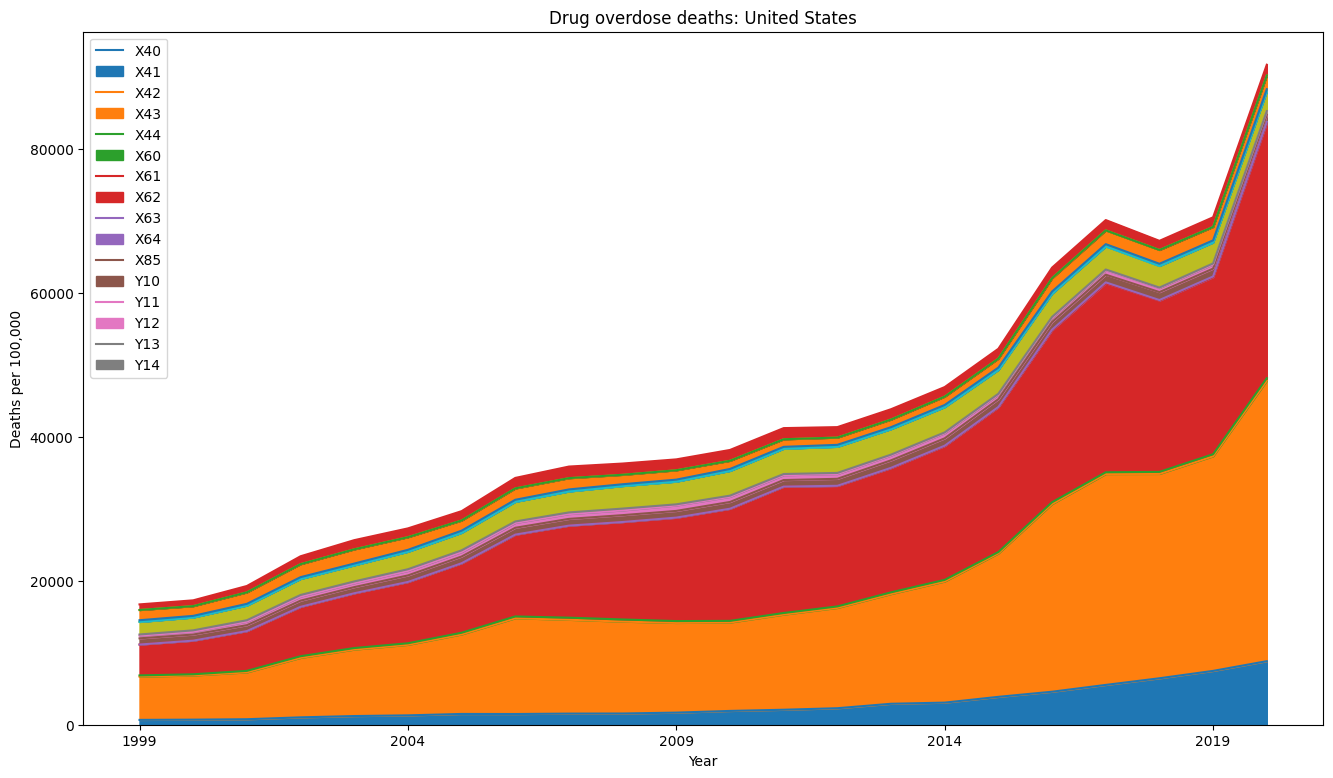

In [ ]:
df_groups = df.groupby(by=['Year','Cause of Death'],as_index=False).sum()
df_pivot = df_groups.pivot(index='Year',columns='Cause of Death',values='Deaths')

ax = df_pivot.plot.area(title='Drug overdose deaths: United States')
legend_labels = ["X40","X41","X42","X43","X44","X60","X61","X62","X63","X64","X85","Y10","Y11","Y12","Y13","Y14"]
ax.legend(legend_labels);
ax.set_ylabel("Deaths per 100,000")
fig = plt.gcf()
fig.set_size_inches(16,9)